X-zrZv_IbzjZUnhsbWlsecLbwjndTpG0ZynXOif7V-


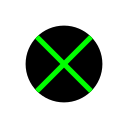

a4ayc_80_OGda4BO_1o_V0etpOqiLx1JwB5S3beHW0


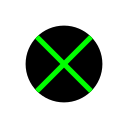

In [22]:
import hashlib
import base64

import cairo
from IPython.display import Image, display
from math import pi
from io import BytesIO

def disp_and_save(draw_func,folder="Icons/",filename='output',res=128):
    width=res
    height=res
    
    # Create an ImageSurface for PNG display
    surface_png = cairo.ImageSurface(cairo.FORMAT_ARGB32, width, height)
    ctx_png = cairo.Context(surface_png)
    draw_func(ctx_png, width, height)
    
    # Create an SVGSurface to save the image as SVG
    surface_svg = cairo.SVGSurface(folder+filename+".svg", width, height)
    ctx_svg = cairo.Context(surface_svg)
    draw_func(ctx_svg, width, height)
    
    surface_png.write_to_png(folder+filename+".png")
    
    with BytesIO() as fileobj:
        surface_png.write_to_png(fileobj)
        display(Image(fileobj.getvalue(), width=width))
    
    surface_svg.finish()

def draw(cr, width, height):
    cr.scale(width, height)
    cr.set_line_width(0.04)

    cr.arc(0.5, 0.5, 0.3, 0, 2 * pi)
    cr.clip()

    cr.rectangle(0, 0, 1, 1)
    cr.fill()
    cr.set_source_rgb(0, 1, 0)
    cr.move_to(0, 0)
    cr.line_to(1, 1)
    cr.move_to(1, 0)
    cr.line_to(0, 1)
    cr.stroke()

def sentence_to_hash(st):
    hash_object = hashlib.sha256(st.encode("utf-8"))
    hash_bytes = hash_object.digest()

    b64_encoded = base64.urlsafe_b64encode(hash_bytes)
    b64hex_str = b64_encoded.decode("utf-8")

    return b64hex_str


for i in range(2):
    inp=str(i)
    b64str=sentence_to_hash(inp)[:42]
    print(b64str)
    disp_and_save(draw, filename=b64str)
